In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import special
from scipy.integrate import quad

In [65]:
def cf_normal(u, mu=0.1, sig=0.2):
    return np.exp( 1j * u * mu - 0.5 * u**2 * sig**2 )

In [40]:
def Gil_Pelaez_pdf(x, cf):
    integrand = lambda u: np.real( np.exp(-u*x*1j) * cf(u) )
    return 1/np.pi * quad(integrand, 1e-10, 20 )[0]

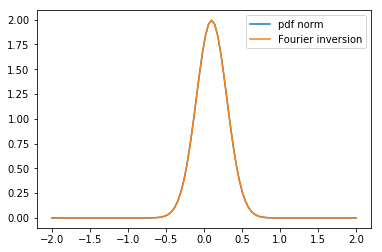

In [42]:
x = np.linspace(-2,2,100)

plt.plot(x,ss.norm.pdf(x, loc=0.1, scale=0.2), label="pdf norm")
plt.plot(x,[Gil_Pelaez_pdf(i,cf_normal) for i in x], label="Fourier inversion" )
plt.legend()
plt.show()

In [30]:
def cf_gamma(u, a=1):
    return (1 - u * 1j)**(-a) 

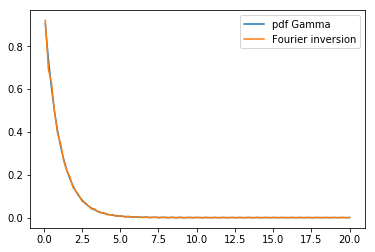

In [36]:
x = np.linspace(0.1,20,100)

plt.plot(x,ss.gamma.pdf(x,1), label="pdf Gamma")
plt.plot(x,[Gil_Pelaez_pdf(i,cf_gamma) for i in x], label="Fourier inversion" )
plt.legend()
plt.show()

In [37]:
f = lambda u: np.real( np.exp(-u*2*1j) * cf_gamma(u) )

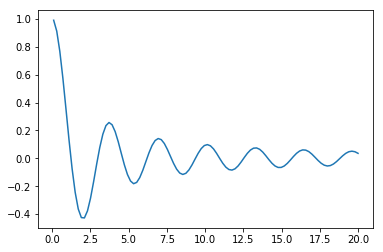

In [38]:
plt.plot(x, f(x))

In [80]:
sig = 0.2
r = 0.1
adj_r = r - 0.5 * sig**2
adj_r2 = r + 0.5 * sig**2

In [166]:
def P1(k, cf):
    integrand = lambda u: np.real( (np.exp(-u*k*1j) / (u*1j)) * 
                                  (cf(u-1j, mu=np.log(S0) + adj_r)) / cf(-1j, mu=np.log(S0) + adj_r))  
    return 1/2 + 1/np.pi * quad(integrand, 1e-10, 35 )[0]

In [167]:
def P2(k, cf):
    integrand = lambda u: np.real( np.exp(-u*k*1j) /(u*1j) * cf(u, mu=np.log(S0) + adj_r) )
    return 1/2 + 1/np.pi * quad(integrand, 1e-10, 35 )[0]

In [168]:
S0 = 100.0 
K = 100.0
k = np.log(K)
e_ret = np.log(S0) + ( r - 0.5 * sig**2 ) 

In [170]:
call = S0 * P1(k, cf_normal) - K * np.exp(-r) * P2(k, cf_normal)
call

13.269676584525982

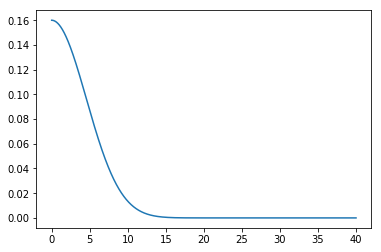

In [140]:
x = np.linspace(0.00001,40,10000)
ff = lambda u: np.real( (np.exp(-u*k*1j) / (u*1j)) * 
                       (cf_normal(u-1j, mu=np.log(S0) + adj_r2) / cf_normal(-1j, mu=np.log(S0) + adj_r2) ) )
plt.plot(x, ff(x))

In [142]:
1/2 + 1/ np.pi * quad(ff, 1e-10, 25 )[0]

0.7881446382471852

In [146]:
P1(k,cf_normal)

0.7881446382471853

In [159]:
Q2 = quad(lambda x: ss.norm.pdf(x, loc=np.log(S0) + adj_r, scale=sig), k, np.inf  )[0]
print(Q2)

0.6554217416103246


In [105]:
Q1 = np.exp(-r) * quad(lambda x: x * ss.lognorm.pdf(x, sig, scale=np.exp(e_ret)), K, 500  )[0]
print(Q1)

72.57468822498801


In [101]:
Q1 - np.exp(-r) * K * Q2

13.269676584656217

In [104]:
Q11 = S0 * quad(lambda x: ss.norm.pdf(x, loc=np.log(S0) + adj_r2, scale=sig), k, np.inf  )[0]
print(Q11)

72.57468822499268


In [158]:
np.exp(-r) * K * Q2

59.30501164033179